Goal Compare property value throughout the years
- see where most places has people moving in and out (look at number of sales)
- see which place is most expensive (look at average sell price)
- see which place is on the rise (look at median sale price)
- see if we can get data from those years to predict current prices (do regression fit line, year to amount - use median sale)

source file:
property values - https://catalog.data.gov/dataset?q=Summary+of+Neighborhood+Sales+for+Queens&as_sfid=AAAAAAX1aTcL_dTLlWLD69I2ZrQhG5DeLLi-Rciu0eK3gTdzSTTd9zcm9YypC4hbJTs_BBHFR4LKlxINv8KvGv2thiC3_qaEyhYdozu40X7vkjoxL5wHk8a6gdWOjky49KUKvDg%3D&as_fid=b9d75d678b79b72a1d8bb9d04356231f210c5ac0 (2008 and 2009)

neighborhood shape files - https://www1.nyc.gov/site/planning/data-maps/open-data/bytes-archive.page?sorts[year]=0&queries[search]=Neighborhood (Neighborhood Tabulation Areas - Shapefile 2020, 20A)

In [36]:
pip install geopandas

     |████████████████████████████████| 994 kB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 10.5 MB/s eta 0:00:01
     |████████████████████████████████| 6.5 MB 13.2 MB/s eta 0:00:01
     |████████████████████████████████| 15.3 MB 13.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [206]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [163]:
p2008 = pd.read_csv("./2008.csv")
p2009 = pd.read_csv("./2009.csv")

,NEIGHBORHOOD,TYPE OF HOME,NUMBER OF SALES,LOWEST SALE PRICE,AVERAGE SALE PRICE,MEDIAN SALE PRICE,HIGHEST SALE PRICE
0,AIRPORT LA GUARDIA,01 ONE FAMILY HOMES,1,425000.0,425000.0,425000.0,425000.0
1,AIRPORT LA GUARDIA,02 TWO FAMILY HOMES,1,575000.0,575000.0,575000.0,575000.0
2,ARVERNE,01 ONE FAMILY HOMES,35,150000.0,295315.0,273667.0,705000.0
3,ARVERNE,02 TWO FAMILY HOMES,156,210000.0,513853.0,542337.0,967337.0
4,ARVERNE,03 THREE FAMILY HOMES,8,286500.0,422919.0,444500.0,525000.0
...,...,...,...,...,...,...,...
150,WOODHAVEN,02 TWO FAMILY HOMES,101,200000.0,500715.0,508247.0,723500.0
151,WOODHAVEN,03 THREE FAMILY HOMES,21,217500.0,483278.0,500000.0,750000.0
152,WOODSIDE,01 ONE FAMILY HOMES,27,200664.0,512454.0,515000.0,900000.0
153,WOODSIDE,02 TWO FAMILY HOMES,33,200000.0,651098.0,633356.0,1350000.0


In [375]:
neighborhoods9 = p2009['NEIGHBORHOOD'].unique()
neighborhoods8 = p2008['NEIGHBORHOOD'].unique()

counter = 0
for n in neighborhoods8:
    if n in neighborhoods9:
        continue
    else:
        print(counter)
        
p2008['NEIGHBORHOOD'] = p2009['NEIGHBORHOOD'].str.strip()
p2009['NEIGHBORHOOD'] = p2009['NEIGHBORHOOD'].str.strip()
sales_dict = {}

for n in neighborhoods9:
    sales_dict[n] = 0
        
for i, row in p2008.iterrows():
    if row['NEIGHBORHOOD'] in sales_dict: 
        sales_dict[row['NEIGHBORHOOD']] += row["NUMBER OF SALES"]
    else:
        sales_dict[row["NEIGHBORHOOD"]] = row["NUMBER OF SALES"]
        
for i, row in p2009.iterrows():
    if row['NEIGHBORHOOD'] in sales_dict: 
        sales_dict[row['NEIGHBORHOOD']] += row["NUMBER OF SALES"]
    else:
        sales_dict[row["NEIGHBORHOOD"]] = row["NUMBER OF SALES"]
        

In [376]:
nb_data = gpd.read_file("./nynta.shp")
to_drop = nb_data[nb_data["BoroName"] != "Queens"].index
nb_data.drop(to_drop, inplace=True)
nb_data

# print(p2009['NEIGHBORHOOD'].unique())
# print(np.sort(nb_data.NTAName.unique()))
nb_data = nb_data.drop(columns=["BoroCode", "BoroName", "CountyFIPS", "NTACode", "Shape_Leng", "Shape_Area"])

[]

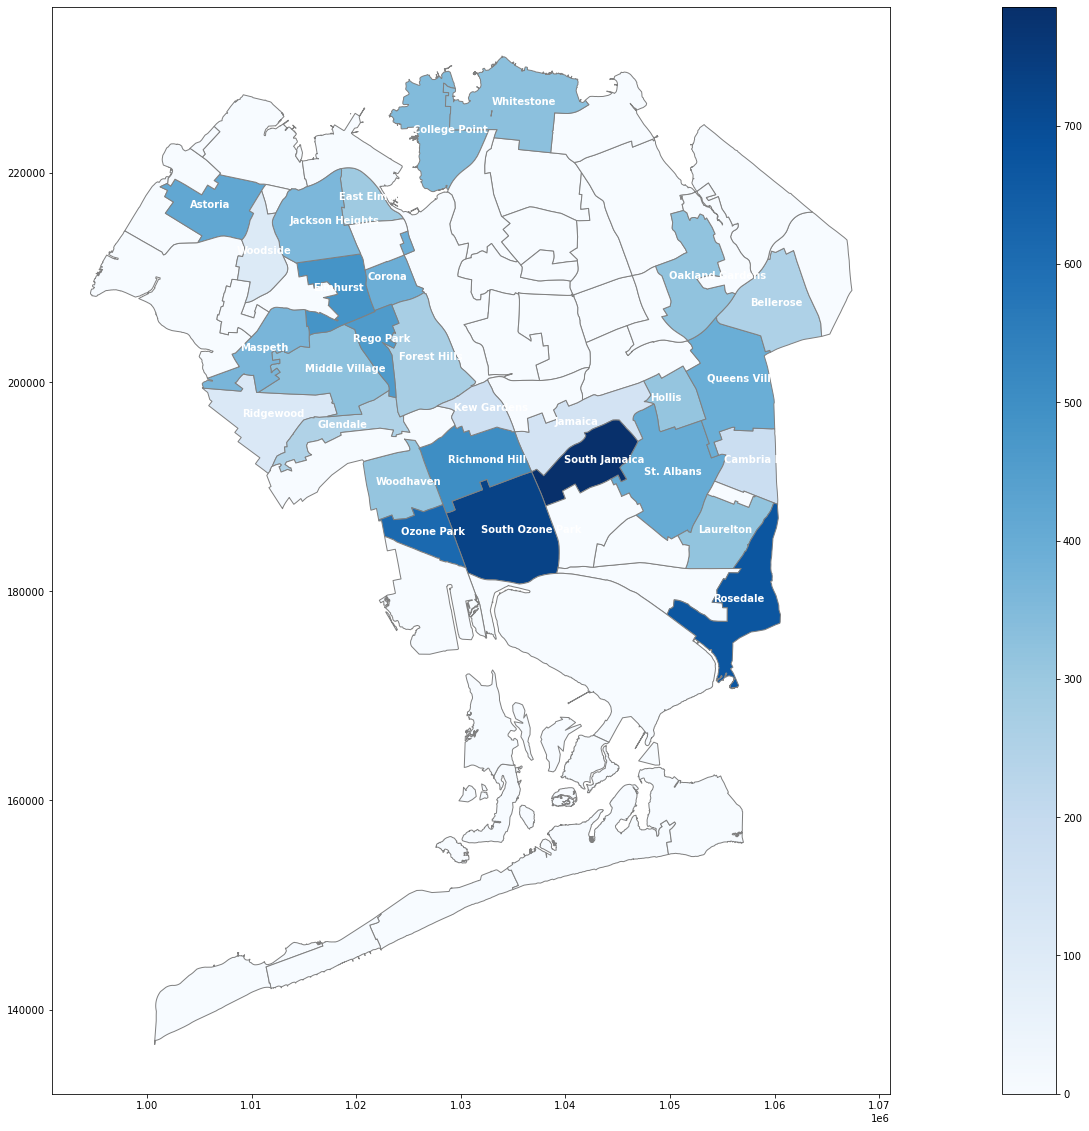

In [377]:
nb_data['sales'] = 0

for i, row in nb_data.iterrows():
    if row['NTAName'].upper() in sales_dict:
        nb_data.at[i, 'sales'] = sales_dict[row['NTAName'].upper()]

nb_map = nb_data.plot(column='sales', k=8, cmap='Blues', figsize=(40,20), linewidth=1, edgecolor='0.5', legend=True)

for i, row in nb_data.iterrows():
    if row['NTAName'].upper() in sales_dict:
        x = row['geometry'].centroid.x
        y = row['geometry'].centroid.y
        label = row['NTAName']
        nb_map.annotate(label, xy=(x, y), xytext=(-25, 0), color="white", textcoords="offset points", fontsize=10, weight="bold")


nb_map.plot(ax = nb_map, column = 'sales', color = 'grey', label = 'No Data')